In [1]:
# import dependences
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from splinter import Browser
from bs4 import BeautifulSoup
import re



In [2]:
ATTENDANCE_URL = 'https://records.nhl.com/history/attendance'

In [3]:
# read the csv file into a data frame
data_path = Path('hockey_starting_data', 'Scoring.csv')
name_path = Path('hockey_starting_data', 'Master.csv')
name_data = pd.read_csv(name_path)
data = pd.read_csv(data_path)
merged_data = pd.merge(name_data, data, on='playerID')
data = data[data['lgID']=='NHL']
merged_data


,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [4]:
#Filter the Data frame to the columns we need
clean_data = merged_data[['playerID','firstName','lastName','year', 'tmID', 'GP','G', 'A', 'Pts','SOG','height','weight']]
clean_data = clean_data.rename(columns={'playerID':'Player ID','firstName': 'First Name', 'lastName': 'Last Name', 'tmID': 'Team ID', 'GP':'Games Played', 'G':'Goals', 'A':'Assists','SOG':'Shots on Goal','year':'Year','height':'Height (in)','weight':'Weight (lbs)'})

clean_data

,Player ID,First Name,Last Name,Year,Team ID,Games Played,Goals,Assists,Pts,Shots on Goal,Height (in),Weight (lbs)
0,aaltoan01,Antti,Aalto,1997,ANA,3.0,0.0,0.0,0.0,1.0,73.0,210.0
1,aaltoan01,Antti,Aalto,1998,ANA,73.0,3.0,5.0,8.0,61.0,73.0,210.0
2,aaltoan01,Antti,Aalto,1999,ANA,63.0,7.0,11.0,18.0,102.0,73.0,210.0
3,aaltoan01,Antti,Aalto,2000,ANA,12.0,1.0,1.0,2.0,18.0,73.0,210.0
4,abbeybr01,Bruce,Abbey,1975,CIN,17.0,1.0,0.0,1.0,2.0,73.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45962,zyuzian01,Andrei,Zyuzin,2002,MIN,66.0,4.0,12.0,16.0,113.0,73.0,208.0
45963,zyuzian01,Andrei,Zyuzin,2003,MIN,65.0,8.0,13.0,21.0,104.0,73.0,208.0
45964,zyuzian01,Andrei,Zyuzin,2005,MIN,57.0,7.0,11.0,18.0,80.0,73.0,208.0
45965,zyuzian01,Andrei,Zyuzin,2006,CAL,49.0,1.0,5.0,6.0,36.0,73.0,208.0


In [5]:
clean_data.describe()

,Year,Games Played,Goals,Assists,Pts,Shots on Goal,Height (in),Weight (lbs)
count,45967.000000,45699.000000,45699.000000,45699.000000,45699.000000,36364.000000,45641.000000,45641.000000
mean,1981.589836,41.105035,7.246701,11.491039,18.737740,69.131091,72.045157,192.175215
std,24.010906,27.590780,9.805894,13.835696,22.476742,72.292921,2.286587,18.294421
min,1909.000000,1.000000,0.000000,0.000000,0.000000,0.000000,63.000000,125.000000
25%,1973.000000,14.000000,0.000000,1.000000,1.000000,8.000000,71.000000,180.000000
50%,1987.000000,42.000000,3.000000,6.000000,10.000000,46.000000,72.000000,191.000000
75%,2000.000000,68.000000,11.000000,18.000000,28.000000,111.000000,74.000000,205.000000
max,2011.000000,84.000000,92.000000,163.000000,215.000000,556.000000,81.000000,265.000000


## Avg Player Data

In [6]:
#Get the number of shots on goal per team
per_team_data = clean_data.groupby('Year')['Shots on Goal'].mean().dropna()
per_team_df = pd.DataFrame(per_team_data)

per_team_df.head()

,Shots on Goal
Year,
1967,79.622419
1968,83.742857
1969,87.099415
1970,81.174825
1971,79.436620


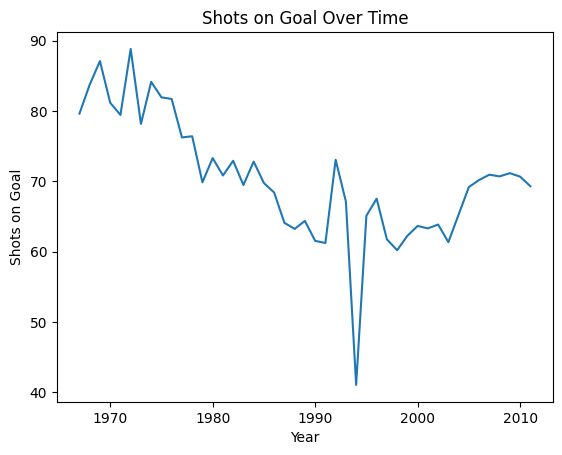

In [7]:
#plot the number of shots on goal over the span of the NHL
plt.plot(per_team_df.index, per_team_df['Shots on Goal'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shots on Goal')
plt.title('Shots on Goal Over Time')
plt.show()


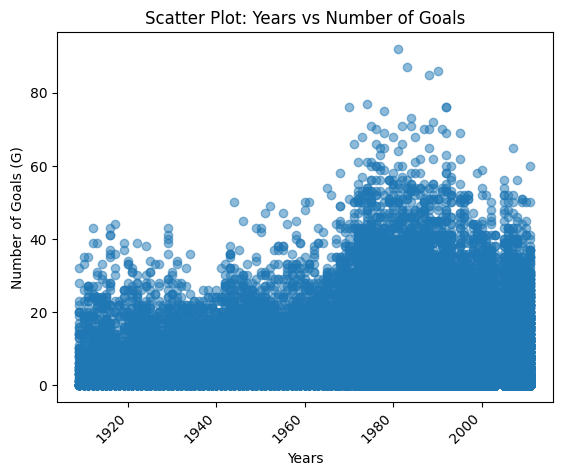

In [8]:
plt.scatter(clean_data['Year'], clean_data['Goals'], alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Number of Goals (G)')
plt.title('Scatter Plot: Years vs Number of Goals')
plt.xticks(rotation=45, ha='right')

fig1=plt.gcf()
plt.show()

fig1.savefig('Output_files/sam/player_stats_output/scatterplot.png')


In [9]:
yearly_goal_avg = pd.DataFrame(clean_data.groupby('Year')['Goals'].mean().reset_index())

yearly_goal_avg

,Year,Goals
0,1909,6.787500
1,1910,7.189655
2,1911,8.500000
3,1912,6.980198
4,1913,6.848214
...,...,...
97,2007,6.637897
98,2008,6.666032
99,2009,6.491412
100,2010,6.352552


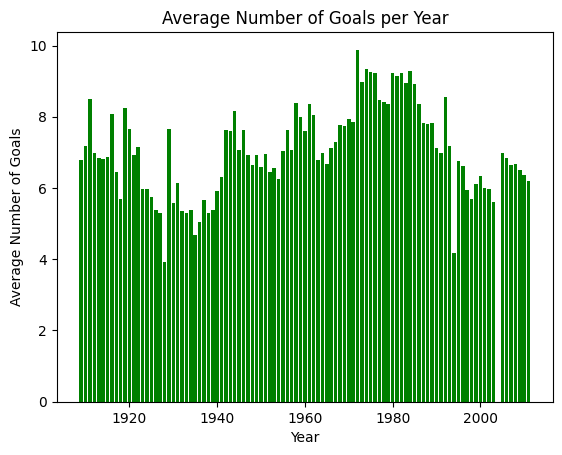

In [10]:
plt.bar(yearly_goal_avg['Year'], yearly_goal_avg['Goals'], color='green')
plt.xlabel('Year')
plt.ylabel('Average Number of Goals')
plt.title('Average Number of Goals per Year')


fig1 = plt.gcf()
plt.show()

fig1.savefig('Output_files/sam/player_stats_output/bar_chart.png')


In [11]:
#read in the goalie data into a dataframe from a CSV
goalie_path = Path('hockey_starting_data', 'Goalies.csv')
goalie_data = pd.read_csv(goalie_path, on_bad_lines='skip')
goalie_data = pd.merge(goalie_data, name_data, on='playerID')

#clean and rename dataframe
goalie_data = goalie_data[['playerID','firstName','lastName', 'GP', 'year', 'tmID','lgID','GA','SA']]
goalie_data=goalie_data.rename(columns={'playerID':'Player ID', 'firstName': 'First Name', 'lastName': 'Last Name', 'GP': 'Games Played', 'year': 'Year', 'tmID':'Team ID', 'lgID':'League', 'GA': 'Goals Allowed', 'SA':'Shots Allowed'})
goalie_data = goalie_data.dropna()
goalie_data = goalie_data[goalie_data['League']=='NHL']
goalie_data['Year'].min()

1982

In [12]:
#create a dataframe that gets the avg player statistics by year
avg_ga  =goalie_data.groupby('Year')['Goals Allowed'].mean()
avg_sa = goalie_data.groupby('Year')['Shots Allowed'].mean()
avg_sog = clean_data.groupby('Year')['Shots on Goal'].mean()
avg_ga = pd.DataFrame(avg_ga)
avg_sa = pd.DataFrame(avg_sa)
avg_sog=pd.DataFrame(avg_sog)

#merge the data frames to show the avg player stats
avg_goalie_stats = pd.merge(avg_sa,avg_ga, on='Year')
avg_player_stats = pd.merge(avg_goalie_stats, yearly_goal_avg, on='Year')
avg_player_stats = pd.merge(avg_player_stats, avg_sog, on='Year')
avg_player_stats

,Year,Shots Allowed,Goals Allowed,Goals,Shots on Goal
0,1982,693.418919,86.216216,9.223011,72.913352
1,1983,713.902778,90.319444,8.955405,69.464865
2,1984,742.579710,93.246377,9.275568,72.798295
3,1985,724.263889,91.055556,8.913102,69.744652
4,1986,752.238806,90.238806,8.364993,68.400271
5,1987,774.939394,93.121212,7.815789,64.092732
6,1988,674.506667,82.053333,7.789343,63.226766
7,1989,677.960000,80.586667,7.834177,64.362025
8,1990,624.662500,71.200000,7.131450,61.525799
9,1991,661.197531,73.950617,6.981756,61.218928


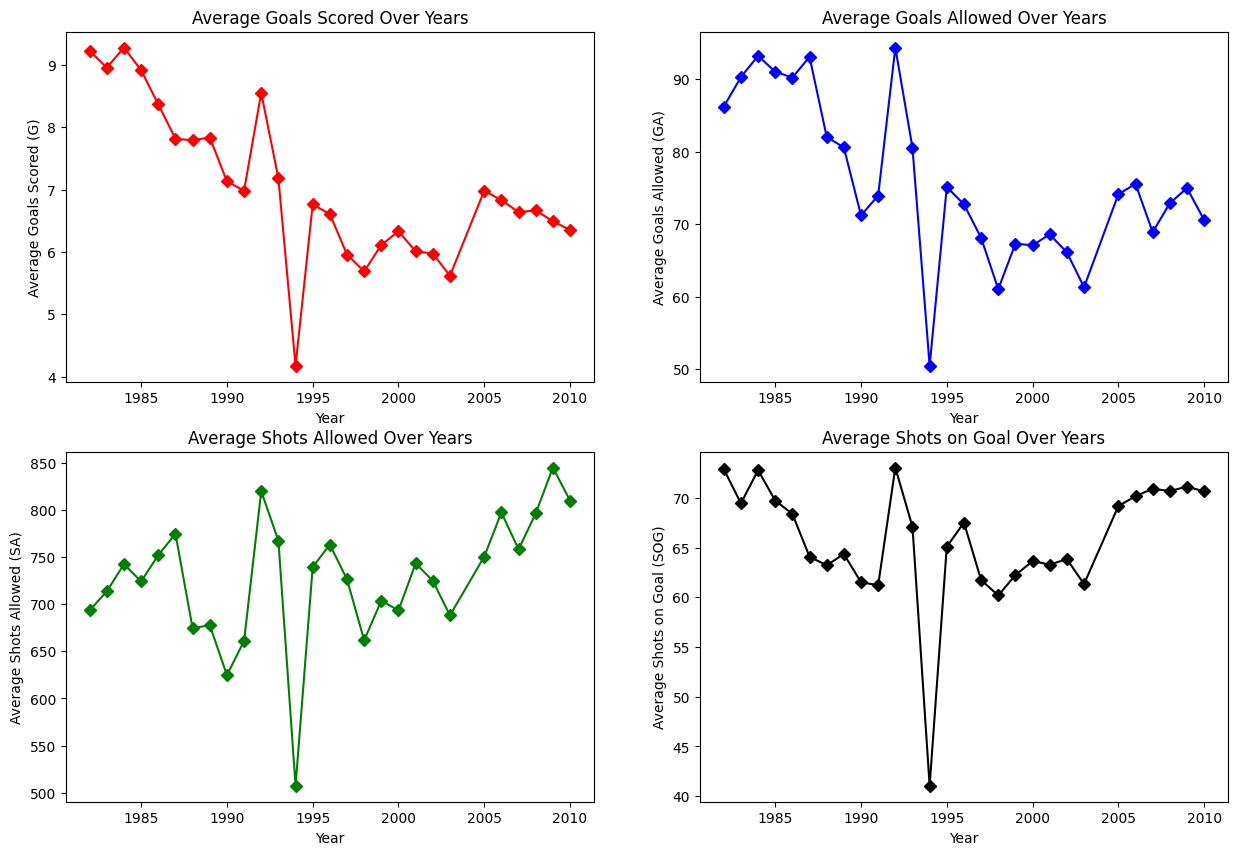

In [13]:
#create a 3 subplots using the avg player data
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize = (15,10))
ax1.plot(avg_player_stats['Year'], avg_player_stats['Goals'], color= 'red', marker='D' )
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Goals Scored (G)')
ax1.set_title('Average Goals Scored Over Years')

ax2.plot(avg_player_stats['Year'], avg_player_stats['Goals Allowed'], color='blue', marker='D')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Goals Allowed (GA)')
ax2.set_title('Average Goals Allowed Over Years')


ax3.plot(avg_player_stats['Year'], avg_player_stats['Shots Allowed'], color='green', marker='D')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Shots Allowed (SA)')
ax3.set_title('Average Shots Allowed Over Years')

ax4.plot(avg_player_stats['Year'], avg_player_stats['Shots on Goal'], color='black', marker='D')
ax4.set_xlabel('Year')
ax4.set_ylabel('Average Shots on Goal (SOG)')
ax4.set_title('Average Shots on Goal Over Years')

fig.savefig('Output_files/sam/player_stats_output/subplot.png')

## Wayne Gretzky Data

In [14]:
#Wayne Gretzky stats
wayne_gretzky = clean_data[(clean_data['Player ID'] == "gretzwa01")]
wayne_gretzky.head()

#without Gretzky stats
no_gretzky = clean_data[(clean_data['Player ID'] != "gretzwa01")]
no_gretzky.head()


,Player ID,First Name,Last Name,Year,Team ID,Games Played,Goals,Assists,Pts,Shots on Goal,Height (in),Weight (lbs)
0,aaltoan01,Antti,Aalto,1997,ANA,3.0,0.0,0.0,0.0,1.0,73.0,210.0
1,aaltoan01,Antti,Aalto,1998,ANA,73.0,3.0,5.0,8.0,61.0,73.0,210.0
2,aaltoan01,Antti,Aalto,1999,ANA,63.0,7.0,11.0,18.0,102.0,73.0,210.0
3,aaltoan01,Antti,Aalto,2000,ANA,12.0,1.0,1.0,2.0,18.0,73.0,210.0
4,abbeybr01,Bruce,Abbey,1975,CIN,17.0,1.0,0.0,1.0,2.0,73.0,185.0


In [15]:
#Wayne Gretzky stats by year
wayne_gretzky_by_year = wayne_gretzky.groupby('Year')['Goals'].sum()
wayne_gretzky_by_year = pd.DataFrame(wayne_gretzky_by_year)
wayne_gretzky_by_year

#all other players by year
no_gretzky_by_year = no_gretzky.groupby('Year')['Goals'].mean()
no_gretzky_by_year = pd.DataFrame(no_gretzky_by_year)
no_gretzky_by_year = no_gretzky_by_year[(no_gretzky_by_year.index)<=1998]
no_gretzky_by_year = no_gretzky_by_year[(no_gretzky_by_year.index)>=1978]

no_gretzky_by_year.reset_index(inplace=True)
wayne_gretzky_by_year.reset_index(inplace=True)


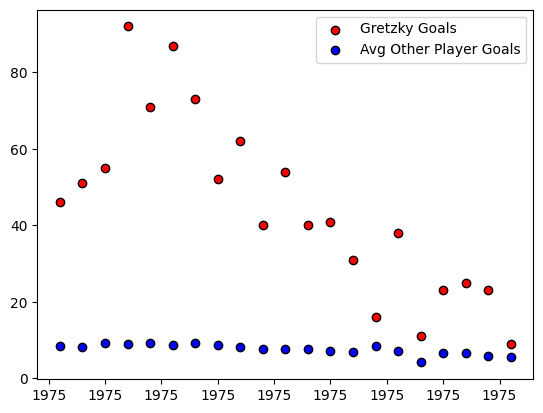

In [16]:
plt.scatter(wayne_gretzky_by_year['Year'],wayne_gretzky_by_year['Goals'], color='r',edgecolors='black')
plt.scatter(no_gretzky_by_year['Year'], no_gretzky_by_year['Goals'], color ='b', edgecolors='black')
legend_labels =['Gretzky Goals', 'Avg Other Player Goals']
plt.legend(legend_labels)

# #chatgpt generated code
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#show plot
fig1 = plt.gcf()
plt.show()

fig1.savefig('Output_files/sam/player_stats_output/gretzky_goals.png', bbox_inches='tight')



## Stats (Plots Generated using ChatGPT code)

              Year  Shots Allowed  Goals Allowed      Goals  Shots on Goal
count    28.000000      28.000000      28.000000  28.000000      28.000000
mean   1995.714286     726.368994      75.776123   7.043056      65.739499
std       8.528198      67.891972      11.126201   1.232282       6.341238
min    1982.000000     507.250000      50.430556   4.173572      41.033595
25%    1988.750000     692.116689      68.464938   6.276916      62.981121
50%    1995.500000     733.018103      74.036533   6.795586      66.102701
75%    2002.250000     764.476149      83.094054   7.820386      70.301863
max    2010.000000     845.125000      94.381579   9.275568      73.058480


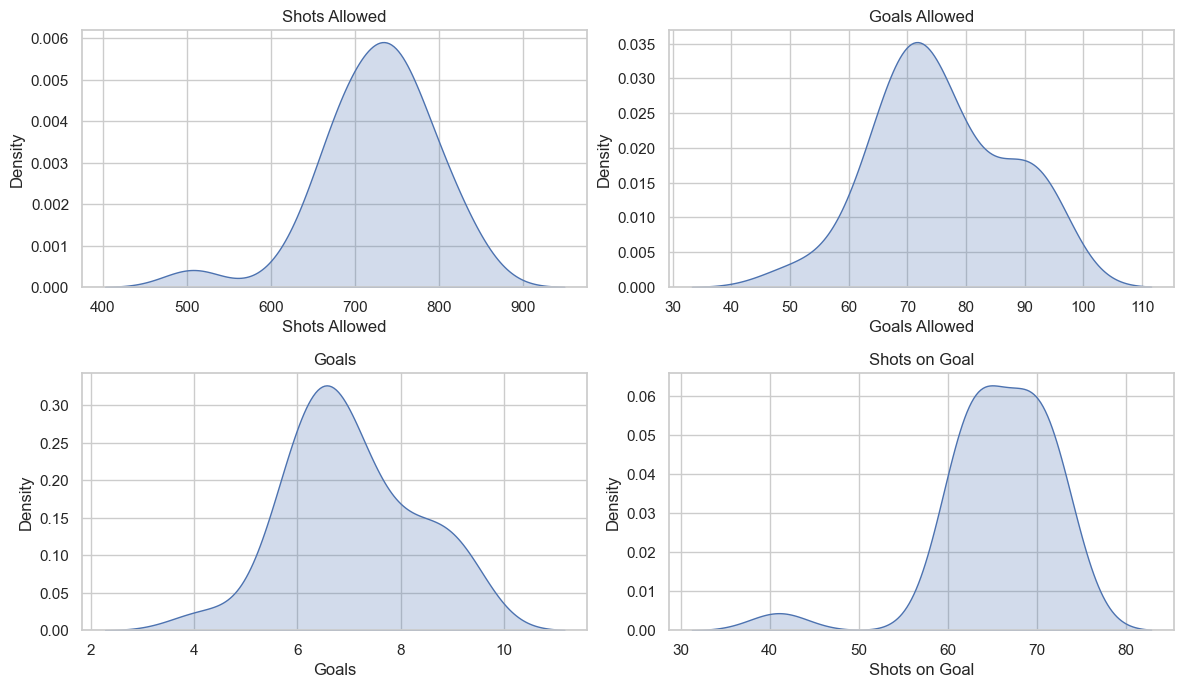

In [17]:
# Summary Statistics
summary_stats = avg_player_stats.describe()
print(summary_stats)

# Histograms
# avg_player_stats.hist(figsize=(12, 10), bins=20)
# plt.suptitle('Histograms of Variables', y=0.95)
# plt.show()

# KDE Plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

for i, column in enumerate(avg_player_stats.columns[1:]):  # Exclude the 'Year' column
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data=avg_player_stats, x=column, fill=True)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

## Measureables

In [18]:
#create bins for decades
bins=[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000, 2010]
bin_labels = ['1920s', '1930s','1940s','1950s', '1960s','1970s','1980s', '1990s', '2000s']

clean_data['Decade'] = pd.cut(clean_data['Year'], bins=bins, labels=bin_labels, right=False)

clean_data[['Year', 'Decade','Height (in)','Weight (lbs)']]



,Year,Decade,Height (in),Weight (lbs)
0,1997,1990s,73.0,210.0
1,1998,1990s,73.0,210.0
2,1999,1990s,73.0,210.0
3,2000,2000s,73.0,210.0
4,1975,1970s,73.0,185.0
...,...,...,...,...
45962,2002,2000s,73.0,208.0
45963,2003,2000s,73.0,208.0
45964,2005,2000s,73.0,208.0
45965,2006,2000s,73.0,208.0


In [19]:
#find the average height of players by decade
height_by_decade = clean_data.groupby('Decade')['Height (in)'].mean()
height_by_decade = pd.DataFrame(height_by_decade)

#find the average weight of players by decade
weight_by_decade = clean_data.groupby('Decade')['Weight (lbs)'].mean()
weight_by_decade = pd.DataFrame(weight_by_decade)


/var/folders/np/wfx8_61x4sd5qgshvt2nf2sh0000gn/T/ipykernel_18937/1211363782.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_by_decade = clean_data.groupby('Decade')['Height (in)'].mean()
/var/folders/np/wfx8_61x4sd5qgshvt2nf2sh0000gn/T/ipykernel_18937/1211363782.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_by_decade = clean_data.groupby('Decade')['Weight (lbs)'].mean()


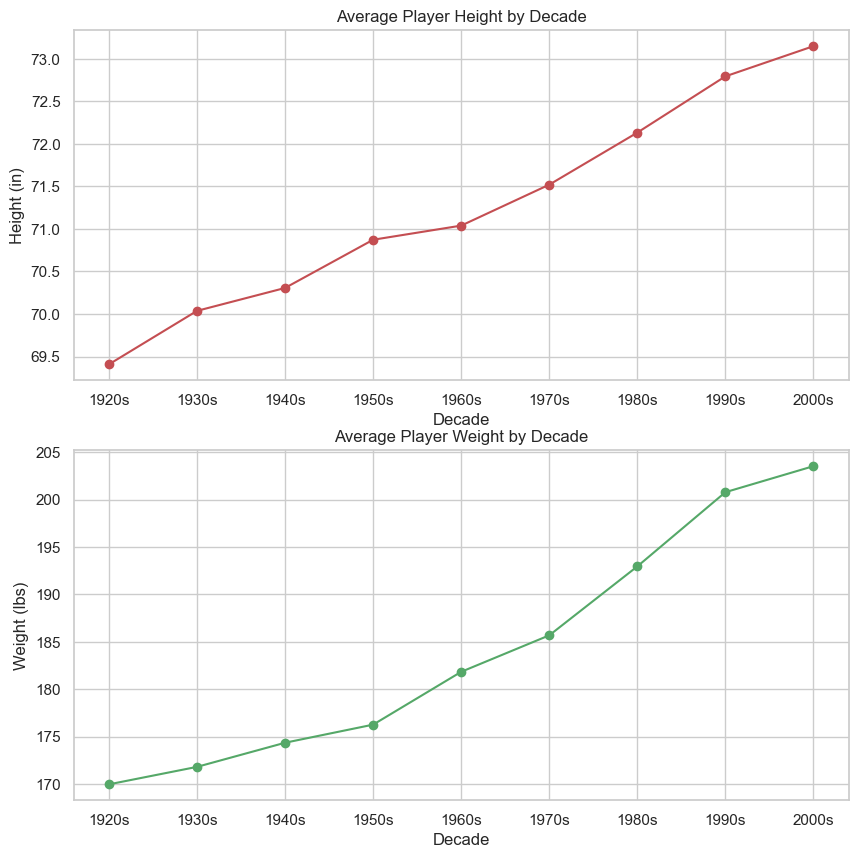

In [20]:
#plot player measureables by decade

fig1, (ax1, ax2)= plt.subplots(2,1, figsize=(10,10))
ax1.plot(height_by_decade.index, height_by_decade['Height (in)'], marker='o', color='r')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Height (in)')
ax1.set_title('Average Player Height by Decade')

ax2.plot(weight_by_decade.index, weight_by_decade['Weight (lbs)'], marker='o', color='g')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Weight (lbs)')
ax2.set_title('Average Player Weight by Decade')

fig1.savefig('Output_files/sam/player_stats_output/measurables.png')

## Viewership

In [21]:
#scrape the header values from url
browser = Browser('chrome')


In [22]:
browser.visit(ATTENDANCE_URL)

In [23]:
soup=BeautifulSoup(browser.html, 'html.parser')

In [34]:
#find headers after inspecting website
ths = soup.find_all('div', class_='rt-th')
ths

[]

In [25]:
#find headers
headers = [col.text for col in ths]
headers

[]

In [26]:
#use list comprehension to get out data for each column
rows = soup.find_all('div', class_='rt-tr')
attendance_data = []

for row in rows[1:]:
    tds = row.find_all('div', class_='rt-td')
    row_data = [col.text.replace(',','') for col in tds]
    attendance_data.append(row_data)

attendance_data    

[]

In [27]:
for row_data in attendance_data:
    row_data[0] = re.sub(r"-+\d+", "", row_data[0])

In [31]:
#put the data into a data frame
attendance_df = pd.DataFrame(attendance_data, columns=headers)
attendance_df

""


In [33]:
# Handle non-numeric values in attendance columns
attendance_cols = ['Season', 'Regular Season Games', 'Playoff Games', 'Regular Season Attendance', 'Playoff Attendance', 'Total Attendance']
for col in attendance_cols:
    attendance_df[col] = pd.to_numeric(attendance_df[col], errors='coerce')

attendance_df.info()

KeyError: 'Season'

In [30]:
#sort the attendance by year and only look at seasons from 1980 onward
attendance_df = attendance_df.sort_values('Season', ascending=True)
attendance_df = attendance_df[attendance_df['Season']>=1980]
#remove na values (2004) and covid year (2020)
attendance_df.dropna(subset=['Regular Season Games'], inplace=True)
attendance_df = attendance_df[attendance_df['Season']!=2020]
attendance_df

KeyError: 'Season'

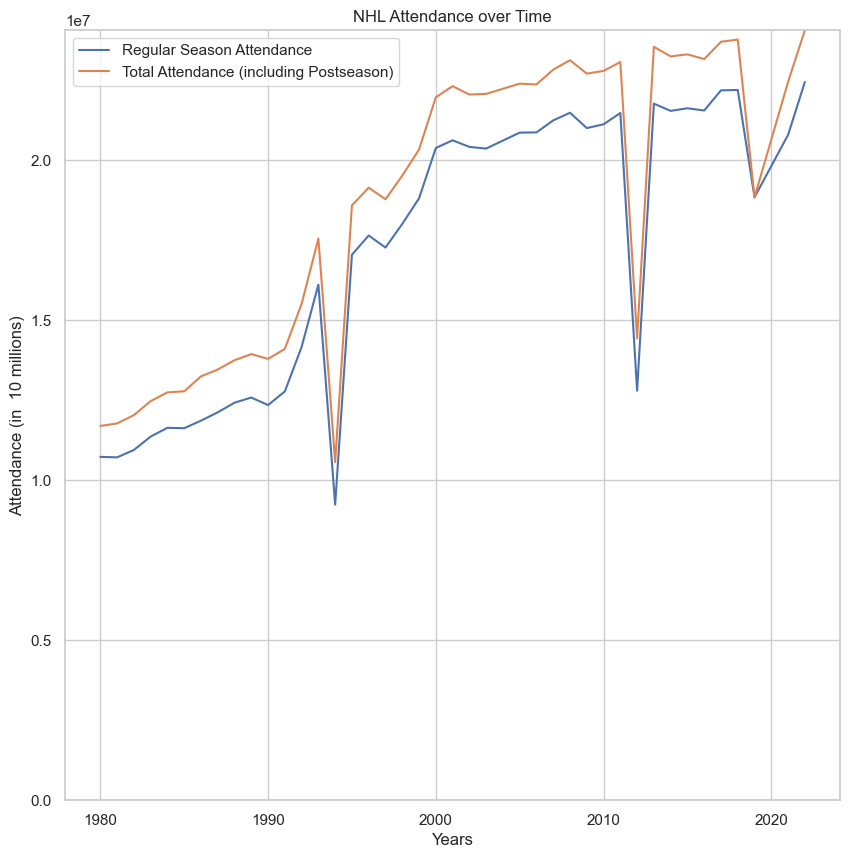

In [128]:
plt.figure(figsize = (10,10))
plt.plot(attendance_df['Season'], attendance_df['Regular Season Attendance'])
# plt.plot(attendance_df['Season'], attendance_df['Playoff Attendance'])
plt.plot(attendance_df['Season'], attendance_df['Total Attendance'])

#formatting for plot
lgnd_labels = ['Regular Season Attendance','Total Attendance (including Postseason)']
plt.xlabel('Years')
plt.ylabel('Attendance (in  10 millions)')
plt.ylim(attendance_df['Playoff Attendance'].min(),attendance_df['Total Attendance'].max())
plt.title('NHL Attendance over Time')
plt.legend(lgnd_labels)

fig1 = plt.gcf()
plt.show()

fig1.savefig('Output_files/sam/player_stats_output/attendance.png')